In [11]:
import pandas as pd 
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [12]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [13]:
df.shape

(157, 16)

In [14]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [15]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [17]:
cols_to_fill_median = [
    "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase",
    "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"
]
for col in cols_to_fill_median:
    df.loc[:, col] = df[col].fillna(df[col].median())

In [18]:
df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             0
Horsepower              0
Wheelbase               0
Width                   0
Length                  0
Curb_weight             0
Fuel_capacity           0
Fuel_efficiency         0
Latest_Launch           0
Power_perf_factor       0
dtype: int64

In [19]:
#  Fehlende Werte in '__year_resale_value' auffüllen

# Den Median für jede Fahrzeugkategorie berechnen
median_values = df.groupby("Vehicle_type")["__year_resale_value"].median()

# Fehlende Werte mit dem entsprechenden Median basierend auf 'Vehicle_type' auffüllen
df["__year_resale_value"] = df.apply(
    lambda row: median_values[row["Vehicle_type"]] if pd.isna(row["__year_resale_value"]) else row["__year_resale_value"],
    axis=1
)

In [20]:
df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

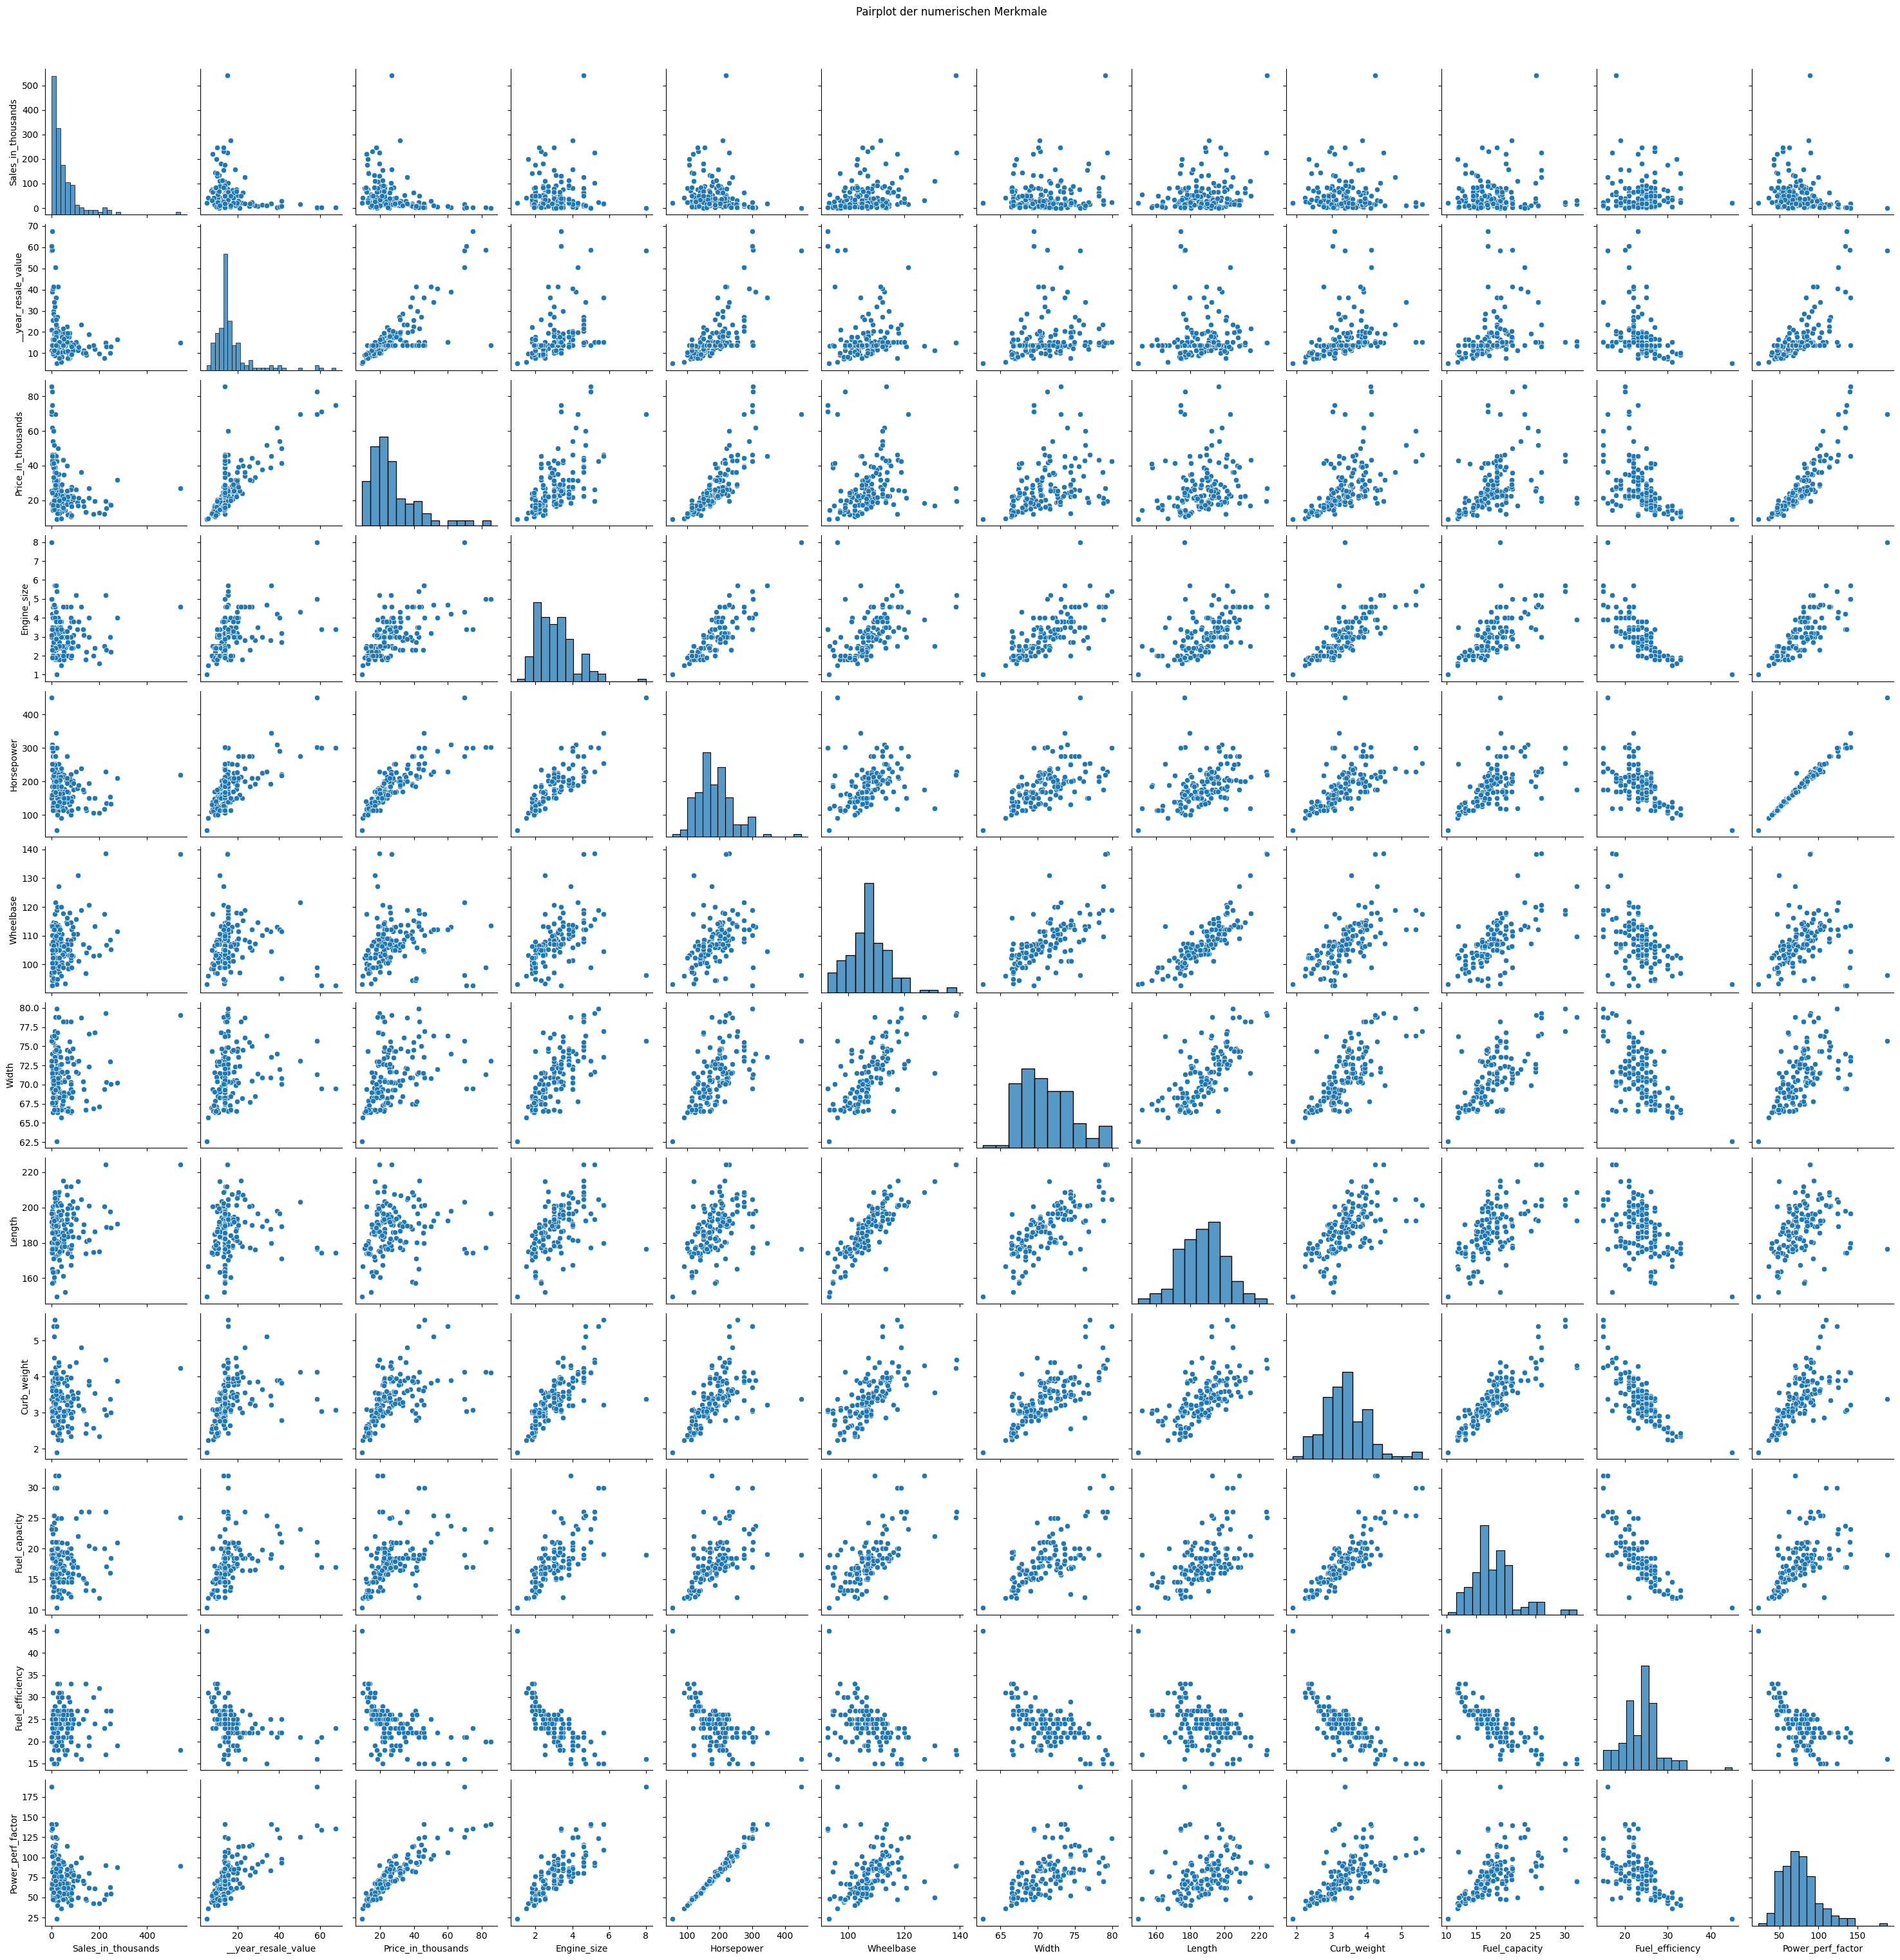

In [23]:
sns.pairplot(numerical_df)
plt.suptitle('Pairplot der numerischen Merkmale', y=1.02)
plt.show()

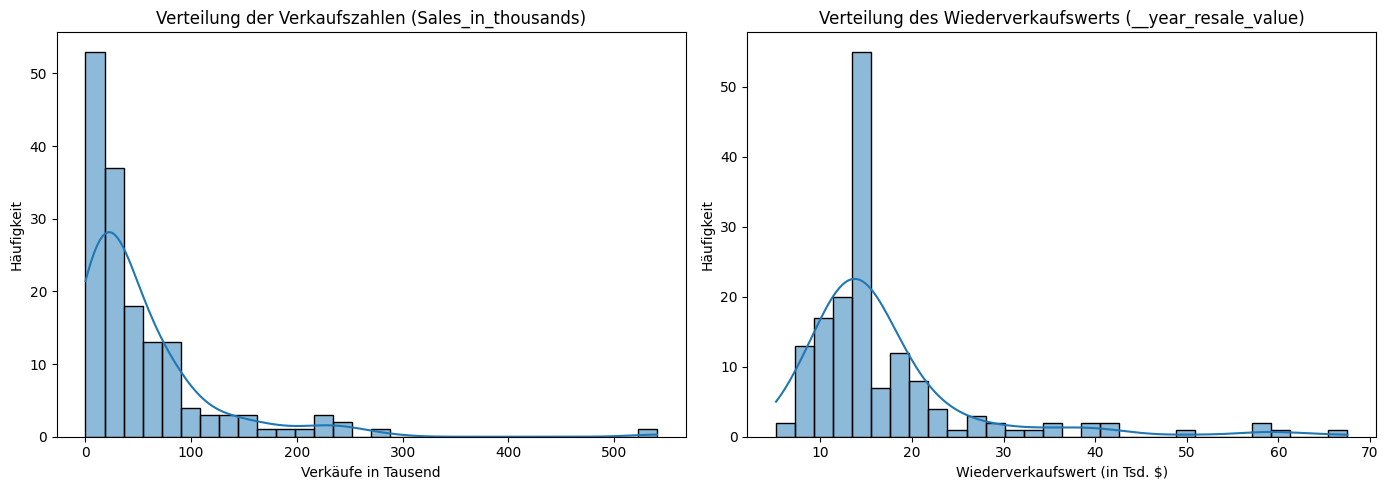

In [26]:
# Histogramme – Verteilungen von 'Sales_in_thousands' & '__year_resale_value'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(df["Sales_in_thousands"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Verteilung der Verkaufszahlen (Sales_in_thousands)")
axes[0].set_xlabel("Verkäufe in Tausend")
axes[0].set_ylabel("Häufigkeit")

sns.histplot(df["__year_resale_value"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Verteilung des Wiederverkaufswerts (__year_resale_value)")
axes[1].set_xlabel("Wiederverkaufswert (in Tsd. $)")
axes[1].set_ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

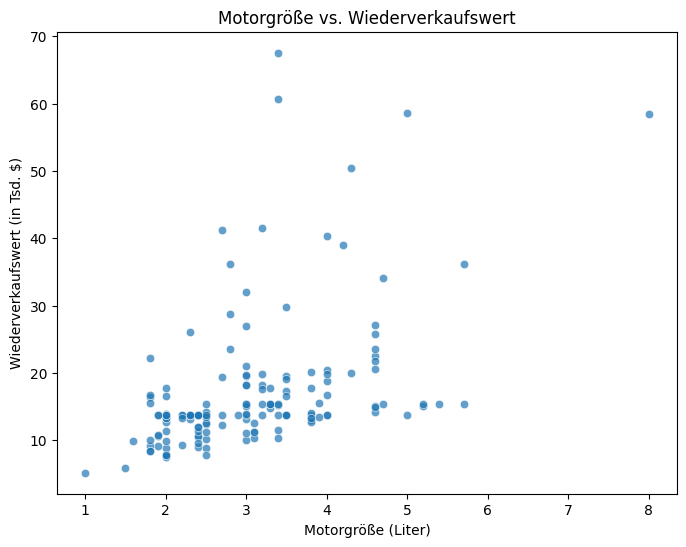

In [30]:
#  Figure und Achse definieren
fig, ax = plt.subplots(figsize=(8, 6))

#  Scatterplot: Motorgröße vs. Wiederverkaufswert
sns.scatterplot(x=df["Engine_size"], y=df["__year_resale_value"], ax=ax, alpha=0.7)

#  Achsentitel setzen
ax.set_title("Motorgröße vs. Wiederverkaufswert")
ax.set_xlabel("Motorgröße (Liter)")
ax.set_ylabel("Wiederverkaufswert (in Tsd. $)")

plt.show()

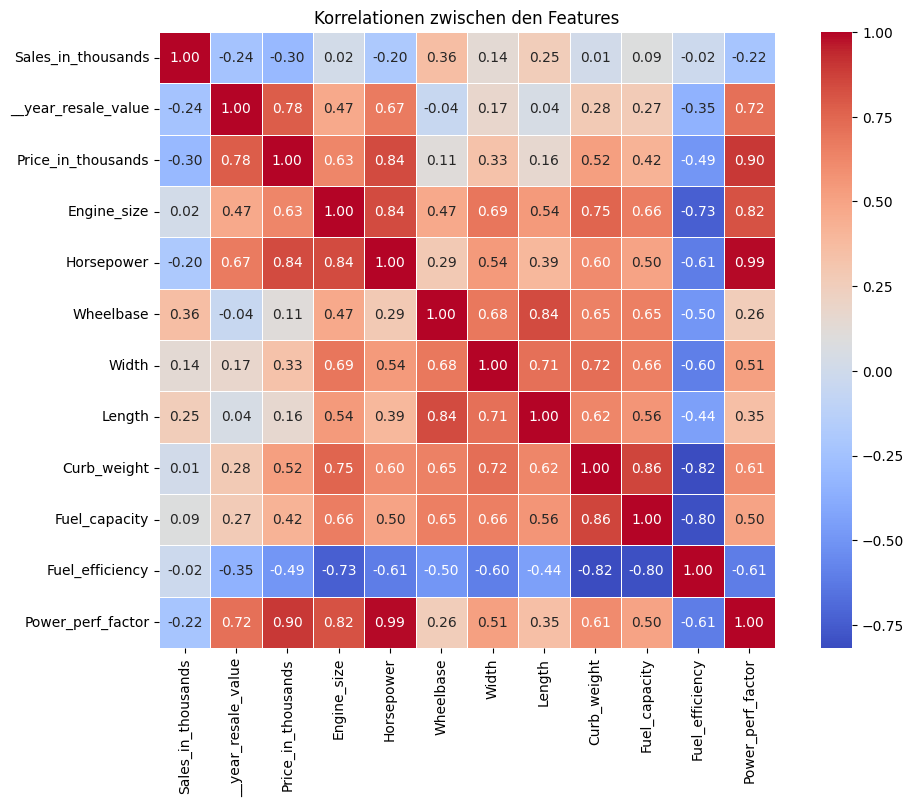

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Figure erstellen mit passender Größe
plt.figure(figsize=(12, 8))

# 🔹 Korrelation berechnen (fehlende Werte ignorieren)
correlation = df.corr(numeric_only=True)

# 🔹 Heatmap plotten
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)

# 🔹 Titel setzen
plt.title("Korrelationen zwischen den Features")

plt.show()

Modellkoeffizient (Slope): 0.5597510286382957
Intercept: 1.8933501732060307


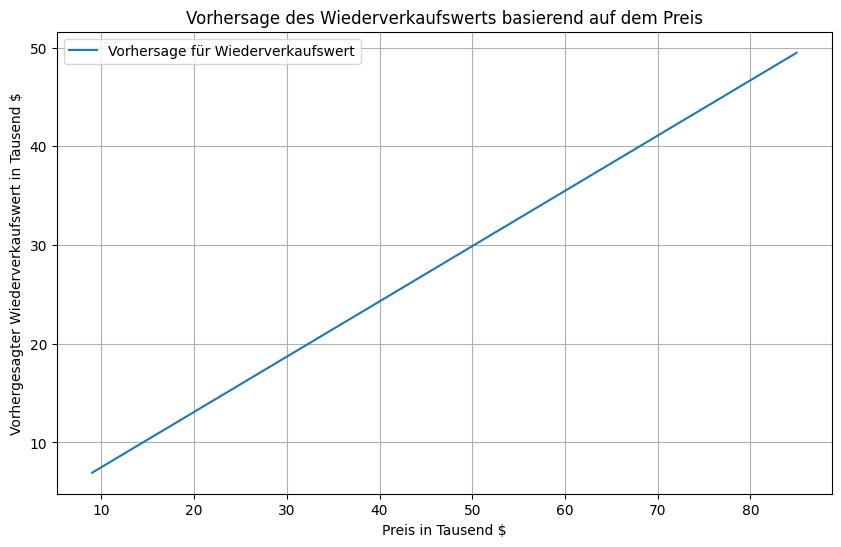

In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Daten vorbereiten
X = df[['Price_in_thousands']]  # Unabhängige Variable (Feature)
y = df['__year_resale_value']   # Abhängige Variable (Ziel)

# Lineares Regressionsmodell
model = LinearRegression()
model.fit(X, y)

# Modellkoeffizienten und Intercept
print(f"Modellkoeffizient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Vorhersagen erstellen
df_predict = pd.DataFrame({'Price_in_thousands': range(int(df["Price_in_thousands"].min()), int(df["Price_in_thousands"].max()) + 1)})
df_predict['predicted_value'] = model.predict(df_predict[['Price_in_thousands']])

# Visualisierung der Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(df_predict['Price_in_thousands'], df_predict['predicted_value'], label='Vorhersage für Wiederverkaufswert')

# Achsen und Titel hinzufügen
plt.xlabel('Preis in Tausend $')
plt.ylabel('Vorhergesagter Wiederverkaufswert in Tausend $')
plt.title('Vorhersage des Wiederverkaufswerts basierend auf dem Preis')
plt.legend()
plt.grid()
plt.show()

Modellkoeffizient (Slope): 0.5597510286382957
Intercept: 1.8933501732060307


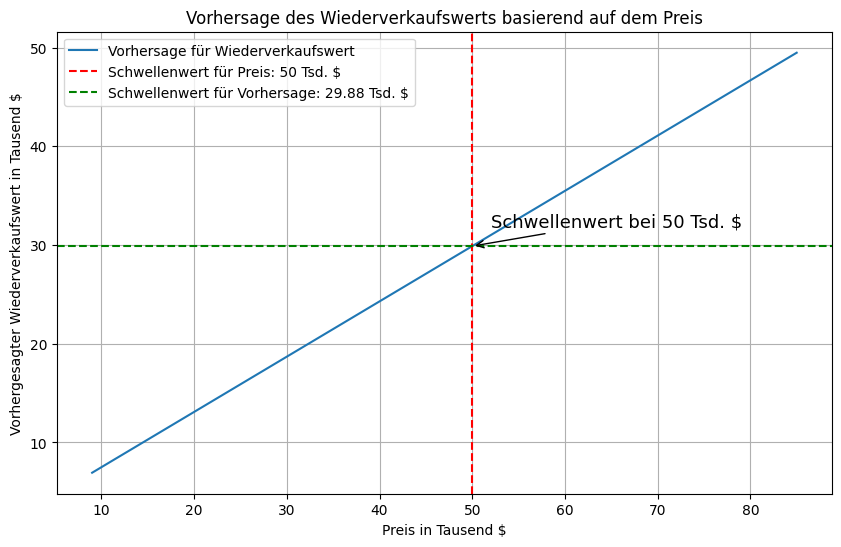

In [42]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd



# Daten vorbereiten
X = df[['Price_in_thousands']]  # Unabhängige Variable (Feature) als DataFrame
y = df['__year_resale_value']   # Abhängige Variable (Ziel)

# Lineares Regressionsmodell
model = LinearRegression()
model.fit(X, y)

# Modellkoeffizienten und Intercept
print(f"Modellkoeffizient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Vorhersagen erstellen
df_predict = pd.DataFrame({'Price_in_thousands': range(int(df["Price_in_thousands"].min()), int(df["Price_in_thousands"].max()) + 1)})
df_predict['predicted_value'] = model.predict(df_predict[['Price_in_thousands']])

# Schwellenwert für eine bestimmte Vorhersage (z.B. 50.000$ als Beispiel)
threshold = 50 # Beispiel-Schwellenwert für den Preis

# Visualisierung der Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(df_predict['Price_in_thousands'], df_predict['predicted_value'], label='Vorhersage für Wiederverkaufswert')

# Vertikale Linie für den Schwellenwert
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Schwellenwert für Preis: {threshold} Tsd. $')

# Horizontale Linie bei y = 0 (optional, wenn du z.B. einen Schwellenwert bei einem bestimmten Wert anzeigen willst)
plt.axhline(y=model.predict(pd.DataFrame([[threshold]], columns=['Price_in_thousands']))[0], color='green', linestyle='--', label=f'Schwellenwert für Vorhersage: {model.predict(pd.DataFrame([[threshold]], columns=["Price_in_thousands"]))[0]:.2f} Tsd. $')

# Pfeil hinzufügen, um den Schwellenwert anzuzeigen
plt.annotate(f'Schwellenwert bei {threshold} Tsd. $', 
             xy=(threshold, model.predict(pd.DataFrame([[threshold]], columns=['Price_in_thousands']))[0]), 
             xytext=(threshold + 2, model.predict(pd.DataFrame([[threshold]], columns=['Price_in_thousands']))[0] + 2),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=13)

# Achsen und Titel hinzufügen
plt.xlabel('Preis in Tausend $')
plt.ylabel('Vorhergesagter Wiederverkaufswert in Tausend $')
plt.title('Vorhersage des Wiederverkaufswerts basierend auf dem Preis')
plt.legend()
plt.grid()
plt.show()